________________
# Decision Trees and Random Forest - 
# 'Who wants my money?' Lending Club
______________
I will be exploring publicly available data from [LendingClub.com](www.lendingclub.com) in this notebook. 

**Lending Club** connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. And I will create a model that will help predict this.

I will be using the cleaned data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The original data is available from [here](https://www.lendingclub.com/info/download-data.action). 

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Data
___________________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# read csv files. Append ALL files 2016Q1 to 2018Q1
df = pd.read_csv('input/loan_data.csv')

In [3]:
df.shape

(9578, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
df.sample(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
1755,1,debt_consolidation,0.1411,513.44,11.207758,15.99,707,3360.041667,40868,66.6,0,0,0,1
6136,1,debt_consolidation,0.1531,696.31,11.461632,9.28,697,2610.041667,11219,32.4,0,1,0,0
1392,1,all_other,0.0907,159.17,11.350407,5.46,737,3090.000000,6528,14.3,1,0,0,0
5601,1,all_other,0.0740,77.65,10.878047,14.90,767,6059.958333,23331,58.5,1,0,0,0
8859,0,credit_card,0.1336,541.89,11.918391,24.55,682,7290.000000,146579,85.4,3,0,0,1


## Data Cleaning
___________

I'm working with the cleaned data, so there aren't much 'cleaning' to do.

However, I noticed 'purpose' features is categorical, and I want to transform it into dummy variables to use them in the prediction model.  


In [7]:
df = pd.get_dummies(df, columns = ['purpose'], drop_first = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

great! easy peasy.


## Exploratory Data Analysis
____________

C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


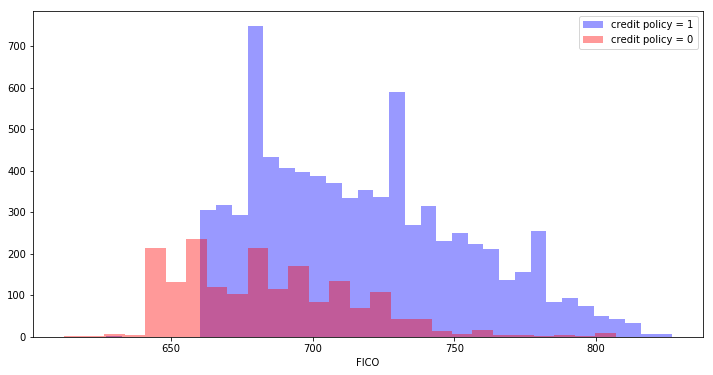

In [8]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['credit.policy'] == 1]['fico'], kde=False, color="b", label='credit policy = 1')
sns.distplot(df[df['credit.policy'] == 0]['fico'], kde=False, color="r", label='credit policy = 0')
plt.xlabel('FICO')
plt.legend()

C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


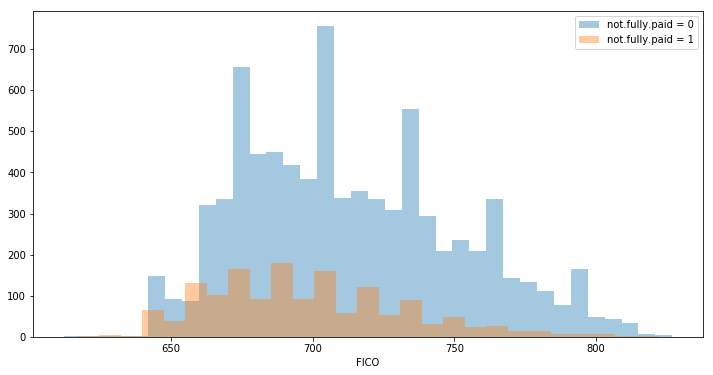

In [9]:
plt.figure(figsize=(12,6))
sns.distplot(df[df['not.fully.paid'] == 0]['fico'], kde=False, label='not.fully.paid = 0')
sns.distplot(df[df['not.fully.paid'] == 1]['fico'], kde=False, label='not.fully.paid = 1')
plt.xlabel('FICO')
plt.legend()

** trend between FICO score and interest rate.**

C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Gabe\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


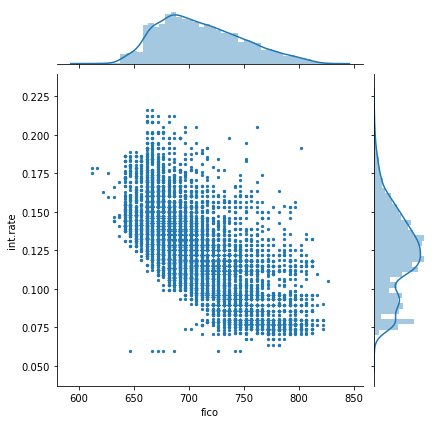

In [10]:
grid = sns.JointGrid(x = 'fico', y = 'int.rate', data = df)
grid.plot_joint(plt.scatter, s = 5)
grid.plot_marginals(sns.distplot)

** is there trend differed between not.fully.paid and credit.policy.**

<Figure size 864x432 with 0 Axes>

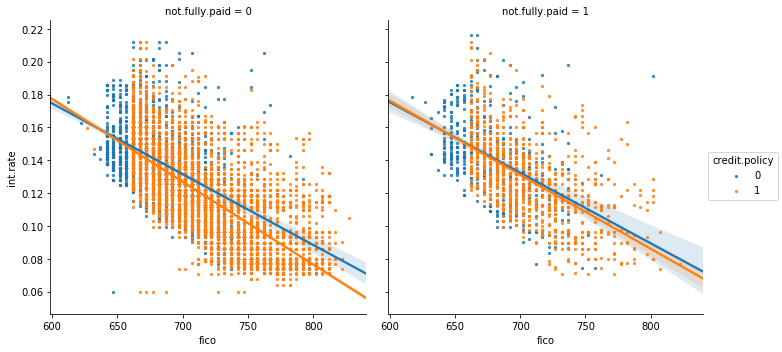

In [11]:
plt.figure(figsize=(12,6))
sns.lmplot(y='int.rate',x='fico',data=df,hue='credit.policy',
           col='not.fully.paid', scatter_kws={"s": 5})

## Prediction Models
_______________

Split the data into train and test sets.

In [12]:
from sklearn.model_selection import train_test_split

# y = not.fully.paid & X = rest
X = df.drop('not.fully.paid',axis=1)
y = df['not.fully.paid']

# split the df into test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

### Decision Tree Model


In [13]:
from sklearn.tree import DecisionTreeClassifier

# Transing a Deicision Tree Model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Predictions and Evaluation of Decision Tree

In [14]:
# get model predictions
predictions = decision_tree.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

# print the evaluation.
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[1988  443]
 [ 334  109]]
             precision    recall  f1-score   support

          0       0.86      0.82      0.84      2431
          1       0.20      0.25      0.22       443

avg / total       0.75      0.73      0.74      2874



76% Precision Rate and 73% Recall Rate

Now that we tried Decision Tree Model, let's try Random Forest Model and see how much we can improve the result by. 

### Random Forest Model

In [15]:
from sklearn.ensemble import RandomForestClassifier

# training the RFM
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=600, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predictions and Evaluation of Random Forest

In [16]:
# get model's prediction
predictions = rfc.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix

# print the evaluation
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[2423    8]
 [ 436    7]]
             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.47      0.02      0.03       443

avg / total       0.79      0.85      0.78      2874



## Conclusion
____________

After looking at the evaluations of both models, the question remains: which performed better?

While Random Forest Model has noticably better precision, but Decision Tree has higher recall on class 1. (0.26 compared to 0.02) 

In order to conclude which model has performed better, it would depend on the metrics we are trying to optimize for. If there is great cost involved with getting class 1 recall higher, Decision Tree might actually be more suitable model. 

However, we could conclude that on average, Random Forest Model did better.